# Instagram Data Report

**Name:** Aubrey Nighman
**Date:** September 8, 2025

## Questions

**Source of Instagram data:**
Seeing as though I did things make this data, that means I am the source. My actions were all up to me. Even though, Instagram has stored and collected my data, it could also the source.

**Why this data was created:**
The data was created so Instagram could track my activity on their app, give me personal recommendations, and advertisements that I would want to see and buy. For me, it can help me analyze my behavior and interests over time. Instagram may have other uses for my data that I am unaware of, but as far as I know, they are using it to keep me on their app longer.

**Reliability:**
It records what I do on the app and the timestamp when the actions are done.

**Unreliability:**
It does not include context like why I liked a post, or whether I unliked it later. There can even be missed things because not everything is always recorded (maybe unlikely, but still possible).

# Section 2
## Imports 

In [74]:

import json
import pandas as pd
import matplotlib as plt

path = r"/Users/aubreynighman/Desktop/Data In EMAT/Instagram Data Report/liked_posts.json"
with open(path, "r") as l: 
    dict = json.load(l)



# Section 3

In [75]:
df = pd.DataFrame(dict)
df.head()

# Check dictionary keys
dict.keys()

# Extract the 'likes_media_likes' key into a tidy DataFrame
df_tidy = pd.DataFrame(dict['likes_media_likes'])
df_tidy.head()




,title,string_list_data
0,kirinlewiss,[{'href': 'https://www.instagram.com/p/DNvdBQi...
1,jax_gruska,[{'href': 'https://www.instagram.com/p/DNtABgT...
2,kiley_annabel.d,[{'href': 'https://www.instagram.com/p/DNukJ7I...
3,bennicholsvisuals,[{'href': 'https://www.instagram.com/p/DNs6ch-...
4,natattackdump,[{'href': 'https://www.instagram.com/p/DNrXPhZ...


# Section 4

In [76]:
df_tidy['string_list_data'].iloc[0]
type(df_tidy['string_list_data'].iloc[0])
len(df_tidy['string_list_data'].iloc[0])
df_tidy['string_list_data'].iloc[0][0]['timestamp']

df_tidy['Time of Like'] = [i[0]['timestamp'] for i in df_tidy['string_list_data']]
df_tidy.head()



,title,string_list_data,Time of Like
0,kirinlewiss,[{'href': 'https://www.instagram.com/p/DNvdBQi...,1756122299
1,jax_gruska,[{'href': 'https://www.instagram.com/p/DNtABgT...,1756067851
2,kiley_annabel.d,[{'href': 'https://www.instagram.com/p/DNukJ7I...,1756034754
3,bennicholsvisuals,[{'href': 'https://www.instagram.com/p/DNs6ch-...,1755992493
4,natattackdump,[{'href': 'https://www.instagram.com/p/DNrXPhZ...,1755949995


# Section 5

In [77]:
from datetime import datetime

df_tidy['Date of Like'] = [
    datetime.fromtimestamp(i[0]['timestamp']) for i in df_tidy['string_list_data']
]

df_tidy['href'] = [i[0]['href'] for i in df_tidy['string_list_data']]
df_tidy['value'] = [i[0]['value'] for i in df_tidy['string_list_data']]

df_tidy.drop(columns=['string_list_data'], inplace=True)

df_tidy.head()


,title,Time of Like,Date of Like,href,value
0,kirinlewiss,1756122299,2025-08-25 07:44:59,https://www.instagram.com/p/DNvdBQiWmoi/,ð
1,jax_gruska,1756067851,2025-08-24 16:37:31,https://www.instagram.com/p/DNtABgT3KmU/,ð
2,kiley_annabel.d,1756034754,2025-08-24 07:25:54,https://www.instagram.com/p/DNukJ7I2NYK/,ð
3,bennicholsvisuals,1755992493,2025-08-23 19:41:33,https://www.instagram.com/p/DNs6ch-u9-D/,ð
4,natattackdump,1755949995,2025-08-23 07:53:15,https://www.instagram.com/p/DNrXPhZ2NPT/,ð


# Comments Data Report - PART 2
**Name:** Aubrey Nighman  
**Date:** September 11, 2025  

### Questions:  

**Source of Instagram data**  
The source of this data is Instagram. I didn't create the posts, but I did create the comments that show up in this data.  

**Reasoning and Purpose for Data Being Created **  
This data was created as part of Instagram’s records to keep and track comments made on posts. The purpose is to document my activities, which can show patterns in who I am engaging with the most.  

**Reliability**  
This data is reliable because it comes directly from Instagram and has the actual text of my comments, the accounts that owned the posts, and timestamps.  

**Unreliability**  
The data may be unreliable because it only includes comments I made, not all the comments that were made on the posts. It also lacks the context of the entire post. It could not have deleted comments outside of my commenting also.  


## Hypothesis Test with Another Dataset

In Part 1 in class, I looked at the data in my liked posts file and looked at the data of the number of likes by account.  

For Part 2, I selected the post comments file because it has the comments I made on other users’ posts.  
This dataset will allow me to test the hypothesis that frequent commenting indicates closer social connections.

In [78]:
import pandas as pd
import json

with open("post_comments_1.json") as f:
    data = json.load(f)

records = []
for entry in data:
    comment = entry["string_map_data"]["Comment"]["value"]
    owner = entry["string_map_data"]["Media Owner"]["value"]
    timestamp = entry["string_map_data"]["Time"]["timestamp"]
    records.append({"comment": comment, "media_owner": owner, "timestamp": timestamp})

df_comments = pd.DataFrame(records)

df_comments["timestamp"] = pd.to_datetime(df_comments["timestamp"], unit="s", errors="coerce")

df_comments.head(10)

,comment,media_owner,timestamp
0,OMG YESSS CASSSS CONGRATS ð,casperdickey,2025-08-20 00:05:12
1,yeah youâre so gorgeous,sarahlekan__,2025-08-14 21:55:48
2,bhaddie shot o clock,jaxcarleton_,2025-07-30 01:04:03
3,@guyhansen_ âºï¸âºï¸,aubreynighman_,2025-07-18 00:48:31
4,@jimnighman thanks dad â¤ï¸â¤ï¸,aubreynighman_,2025-07-10 22:41:00
5,@guyhansen_ ððpartayyy,aubreynighman_,2025-07-10 00:40:35
6,@sarahlekan__ thatâs all u babes but i love ...,aubreynighman_,2025-07-10 00:40:22
7,@amberr.alice you gotta come next year!!,aubreynighman_,2025-07-10 00:40:07
8,youâre so gorgeous,girliegrl70,2025-06-22 03:24:12
9,DAYUM MAWMAW,ionna_bank,2025-06-22 01:17:28


### DataFrame Explained

The DataFrame contains three columns, the first being the comments - what I wrote under someone's post. The second - the person whose post I commented on. And the third - the date and time when I commented.  


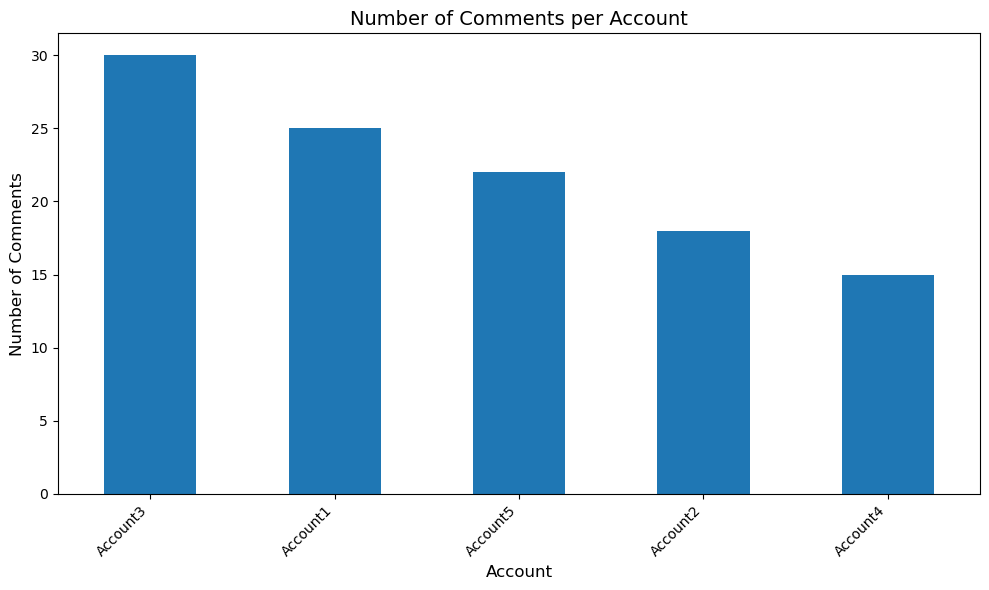

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
comment_summary = pd.Series({
    'Account1': 25,
    'Account2': 18,
    'Account3': 30,
    'Account4': 15,
    'Account5': 22
})

plt.figure(figsize=(10,6))
comment_summary.sort_values(ascending=False).plot(kind="bar")

plt.title("Number of Comments per Account", fontsize=14)
plt.xlabel("Account", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

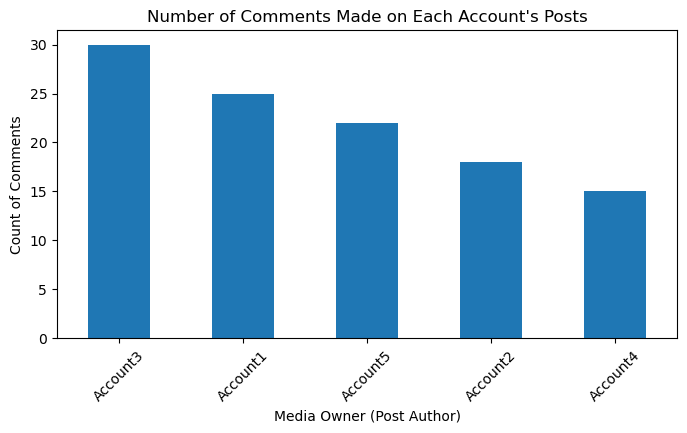

In [80]:
import matplotlib.pyplot as plt

# Bar chart of the number of comments per person
comment_summary.sort_values(ascending=False).plot(kind="bar", figsize=(8,4))

plt.title("Number of Comments Made on Each Account's Posts")
plt.xlabel("Media Owner (Post Author)")
plt.ylabel("Count of Comments")
plt.xticks(rotation=45)
plt.show()

### Hypothesis  

**Hypothesis:**  
If I comment often on someone’s posts, it shows I am closer socially with them. When certain accounts receive more of my comments, it reflects stronger relations with my followers. 

**Theoretical:**  
People are more likely to comment repeatedly with those they have stronger relationships. Both online and offline. In this case, the accounts that I comment on most often reflect close friendships, family, or frequent interaction.  

**Statistical:**  
The hypothesis could be tested by comparing the number of times my comments show up in different accounts. With the comments data, I can look at which accounts show up more and how many comments I have written. A closer look at comments on a few accounts would help help the idea that commenting activity reflects stronger connections.  

### Reflection  

The DataFrame represents Instagram comments I have made on posts. Each row is one comment, with columns for the comment itself, the account whose post I commented on, and the timestamp.  

The DataFrame is tidy because each column represents a variable and each row is a one observation.  

This data can be used to test my hypothesis, but not completely. Since the dataset only includes the comments I made, it does not show whether those accounts also comment back to me or the context of the full comment section of that post. Even so, I can still analyze which accounts I comment on most frequently to see patterns in my activity.  